In [79]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import re
from wordcloud import wordcloud
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  ExtraTreesRegressor
from sklearn.model_selection import train_test_split

In [80]:
df=pd.read_csv('/home/user/project_web/zomato_project.csv')
df

,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews Four Points by Sheraton Bengaluru,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,1500.0,Pubs and bars,Whitefield
51713,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600.0,Pubs and bars,Whitefield
51714,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge Sheraton Grand Bengaluru Whitefield Hotel,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,2000.0,Pubs and bars,Whitefield
51715,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime Sheraton Grand Bengaluru Whitefield Hotel,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,2500.0,Pubs and bars,Whitefield


In [81]:
df.head()

,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,Buffet,Banashankari


In [82]:
df.tail()

,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
51712,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews Four Points by Sheraton Bengaluru,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,1500.0,Pubs and bars,Whitefield
51713,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600.0,Pubs and bars,Whitefield
51714,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge Sheraton Grand Bengaluru Whitefield Hotel,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,2000.0,Pubs and bars,Whitefield
51715,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime Sheraton Grand Bengaluru Whitefield Hotel,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,2500.0,Pubs and bars,Whitefield
51716,"ITPL Main Road, KIADB Export Promotion Industr...",The Nest The Den Bengaluru,No,No,3.4 /5,13,+91 8071117272,"ITPL Main Road, Whitefield","Bar, Casual Dining",NaN,"Finger Food, North Indian, Continental",1500.0,Pubs and bars,Whitefield


In [83]:
df.dtypes

address                         object
name                            object
online_order                    object
book_table                      object
rate                            object
votes                            int64
phone                           object
location                        object
rest_type                       object
dish_liked                      object
cuisines                        object
approx_cost(for two people)    float64
listed_in(type)                 object
listed_in(city)                 object
dtype: object

In [84]:
df.isna().sum()

address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [85]:
df.drop(['phone'],axis=1)

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews Four Points by Sheraton Bengaluru,No,No,3.6 /5,27,Whitefield,Bar,NaN,Continental,1500.0,Pubs and bars,Whitefield
51713,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,Whitefield,Bar,NaN,Finger Food,600.0,Pubs and bars,Whitefield
51714,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge Sheraton Grand Bengaluru Whitefield Hotel,No,No,NaN,0,Whitefield,Bar,NaN,Finger Food,2000.0,Pubs and bars,Whitefield
51715,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime Sheraton Grand Bengaluru Whitefield Hotel,No,Yes,4.3 /5,236,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,2500.0,Pubs and bars,Whitefield


In [86]:
df.duplicated().sum()

76

In [87]:
df.drop_duplicates(inplace=True)

In [88]:
df

,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews Four Points by Sheraton Bengaluru,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,1500.0,Pubs and bars,Whitefield
51713,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600.0,Pubs and bars,Whitefield
51714,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge Sheraton Grand Bengaluru Whitefield Hotel,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,2000.0,Pubs and bars,Whitefield
51715,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime Sheraton Grand Bengaluru Whitefield Hotel,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,2500.0,Pubs and bars,Whitefield


In [89]:
df.duplicated().sum()

0

In [90]:
df.dropna(how='any',inplace=True)
df.isna().sum()

address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
phone                          0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
listed_in(type)                0
listed_in(city)                0
dtype: int64

In [91]:
loc=df['location'].value_counts()
loc

location
Koramangala 5th Block    1782
BTM                      1454
Indiranagar              1346
HSR                      1161
Jayanagar                1037
                         ... 
Yelahanka                   2
Kanakapura Road             2
West Bangalore              2
Rajarajeshwari Nagar        2
KR Puram                    1
Name: count, Length: 88, dtype: int64

In [92]:
df

,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51705,"2nd Floor, Iona, Virginia Mall, Whitefield Mai...",Izakaya Gastro Pub,Yes,Yes,3.8 /5,128,+91 7625087121\n+91 8050587483,Whitefield,"Bar, Casual Dining","Beer, Chicken Guntur, Paneer Tikka, Fish, Nood...","North Indian, Continental, Mediterranean",1200.0,Pubs and bars,Whitefield
51707,"Bengaluru Marriott Hotel, 75, 8th Road, EPIP A...",M Bar Bengaluru Marriott Hotel Whitefield,No,No,3.9 /5,77,080 49435000,Whitefield,"Fine Dining, Bar",Rooftop Ambience,Finger Food,2000.0,Pubs and bars,Whitefield
51708,"Keys Hotel, 6, 1st Phase Industrial Area, Near...",Keys Cafe Keys Hotel,No,No,2.8 /5,161,080 39451000\n+91 8884038484,Whitefield,"Casual Dining, Bar","Salads, Coffee, Breakfast Buffet, Halwa, Chick...","Chinese, Continental, North Indian",1200.0,Pubs and bars,Whitefield
51711,"139/C1, Next To GR Tech Park, Pattandur Agraha...",Bhagini,No,No,2.5 /5,81,080 65951222,Whitefield,"Casual Dining, Bar","Biryani, Andhra Meal","Andhra, South Indian, Chinese, North Indian",800.0,Pubs and bars,Whitefield


In [93]:
df.shape

(23158, 14)

In [94]:
df.columns


Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [95]:
df = df.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type',
                                  'listed_in(city)':'city'})
df.columns


Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines', 'cost',
       'type', 'city'],
      dtype='object')

In [96]:
df.head()

,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,cost,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,Buffet,Banashankari


In [97]:
df['cost'].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        750.,  200.,  850., 1200.,  150.,  350.,  250., 1500., 1300.,
       1000.,  100.,  900., 1100., 1600.,  950.,  230., 1700., 1400.,
       1350., 2200., 2000., 1800., 1900.,  180.,  330., 2500., 2100.,
       3000., 2800., 3400.,   40., 1250., 3500., 4000., 2400., 1450.,
       3200., 6000., 1050., 4100., 2300.,  120., 2600., 5000., 3700.,
       1650., 2700., 4500.])

In [98]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '4.6/5', '4.0/5', '4.2/5', '3.9/5',
       '3.0/5', '3.6/5', '2.8/5', '4.4/5', '3.1/5', '4.3/5', '2.6/5',
       '3.3/5', '3.5/5', '3.8 /5', '3.2/5', '4.5/5', '2.5/5', '2.9/5',
       '3.4/5', '2.7/5', '4.7/5', 'NEW', '2.4/5', '2.2/5', '2.3/5',
       '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5', '2.9 /5',
       '2.7 /5', '2.5 /5', '2.6 /5', '4.5 /5', '4.3 /5', '3.7 /5',
       '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '3.4 /5', '3.6 /5',
       '3.3 /5', '4.6 /5', '4.9 /5', '3.2 /5', '3.0 /5', '2.8 /5',
       '3.5 /5', '3.1 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [99]:
df = df.loc[df.rate !='NEW']

In [100]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '4.6/5', '4.0/5', '4.2/5', '3.9/5',
       '3.0/5', '3.6/5', '2.8/5', '4.4/5', '3.1/5', '4.3/5', '2.6/5',
       '3.3/5', '3.5/5', '3.8 /5', '3.2/5', '4.5/5', '2.5/5', '2.9/5',
       '3.4/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5', '4.8/5',
       '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5', '2.9 /5', '2.7 /5',
       '2.5 /5', '2.6 /5', '4.5 /5', '4.3 /5', '3.7 /5', '4.4 /5',
       '4.9/5', '2.1/5', '2.0/5', '1.8/5', '3.4 /5', '3.6 /5', '3.3 /5',
       '4.6 /5', '4.9 /5', '3.2 /5', '3.0 /5', '2.8 /5', '3.5 /5',
       '3.1 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5', '2.1 /5',
       '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [101]:

df['rate'] = df['rate'].apply(lambda x: x.replace('/5',''))
df

,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,cost,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51705,"2nd Floor, Iona, Virginia Mall, Whitefield Mai...",Izakaya Gastro Pub,Yes,Yes,3.8,128,+91 7625087121\n+91 8050587483,Whitefield,"Bar, Casual Dining","Beer, Chicken Guntur, Paneer Tikka, Fish, Nood...","North Indian, Continental, Mediterranean",1200.0,Pubs and bars,Whitefield
51707,"Bengaluru Marriott Hotel, 75, 8th Road, EPIP A...",M Bar Bengaluru Marriott Hotel Whitefield,No,No,3.9,77,080 49435000,Whitefield,"Fine Dining, Bar",Rooftop Ambience,Finger Food,2000.0,Pubs and bars,Whitefield
51708,"Keys Hotel, 6, 1st Phase Industrial Area, Near...",Keys Cafe Keys Hotel,No,No,2.8,161,080 39451000\n+91 8884038484,Whitefield,"Casual Dining, Bar","Salads, Coffee, Breakfast Buffet, Halwa, Chick...","Chinese, Continental, North Indian",1200.0,Pubs and bars,Whitefield
51711,"139/C1, Next To GR Tech Park, Pattandur Agraha...",Bhagini,No,No,2.5,81,080 65951222,Whitefield,"Casual Dining, Bar","Biryani, Andhra Meal","Andhra, South Indian, Chinese, North Indian",800.0,Pubs and bars,Whitefield


/tmp/ipykernel_2895/1412848271.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=chains,y=chains.index,palette='viridis')


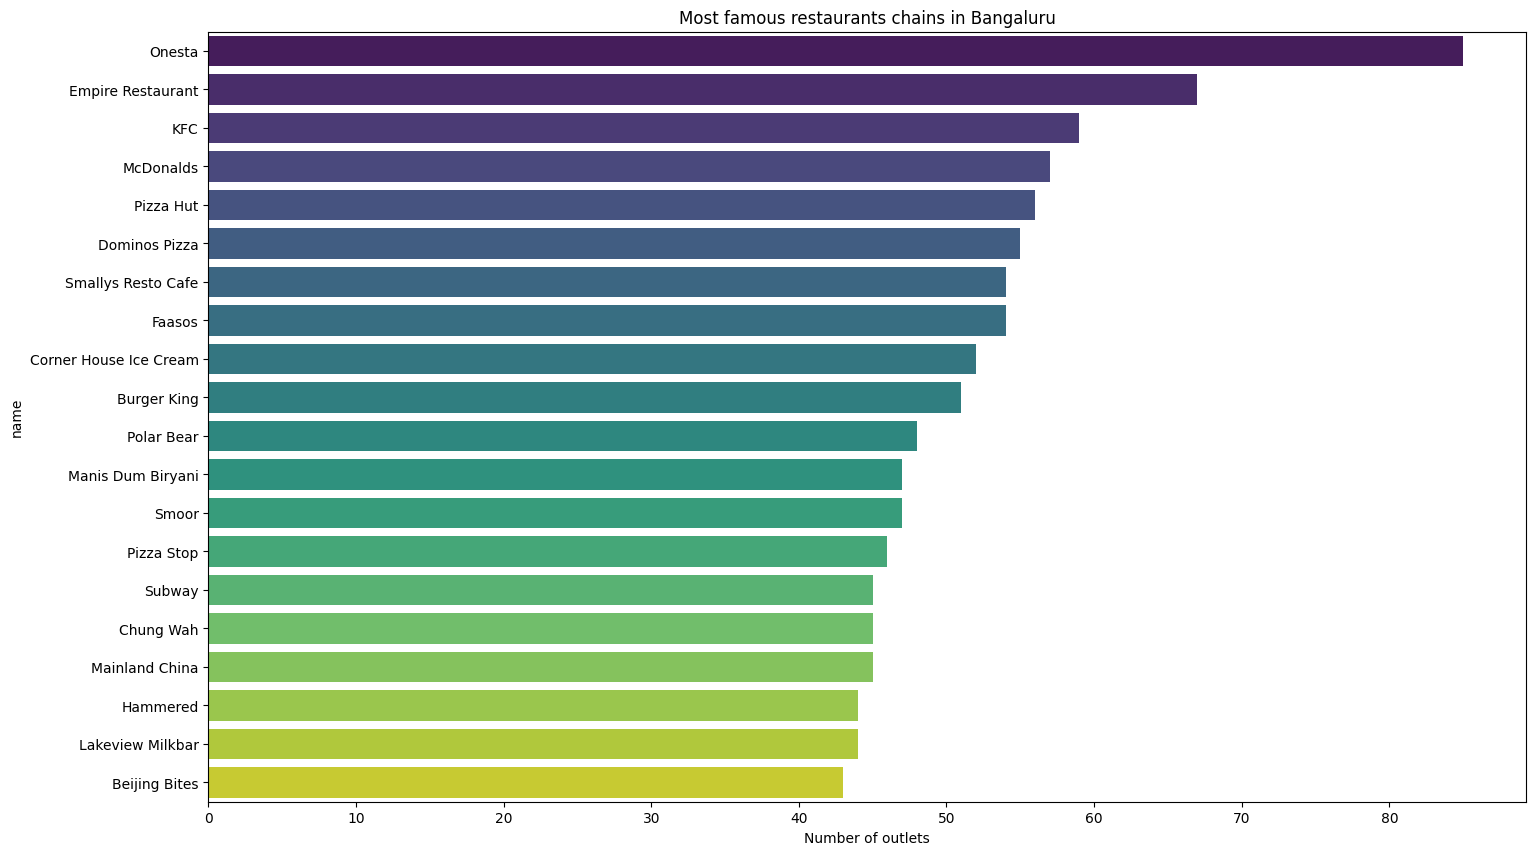

In [102]:
plt.figure(figsize=(17,10))
chains=df['name'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='viridis')
plt.title("Most famous restaurants chains in Bangaluru")
plt.xlabel("Number of outlets")
plt.show()

/tmp/ipykernel_2895/3668176390.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='online_order', data=df, palette='viridis')


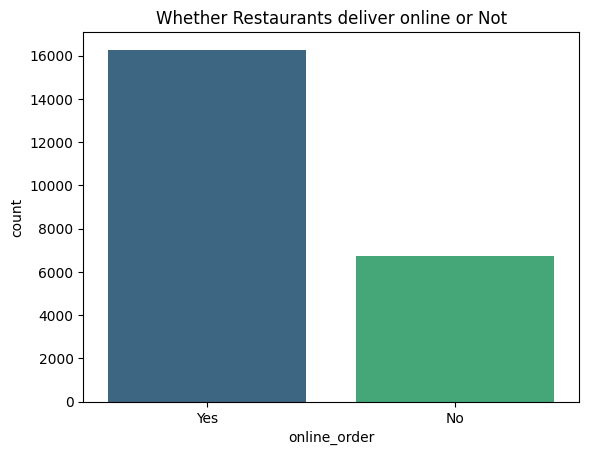

In [103]:
sns.countplot(x='online_order', data=df, palette='viridis')
plt.title('Whether Restaurants deliver online or Not')
plt.show()

In [104]:
loc=df['location'].value_counts()
loc


location
Koramangala 5th Block    1759
BTM                      1444
Indiranagar              1331
HSR                      1154
Jayanagar                1030
                         ... 
Yelahanka                   2
Kanakapura Road             2
West Bangalore              2
Rajarajeshwari Nagar        2
KR Puram                    1
Name: count, Length: 88, dtype: int64

In [105]:
distinct_count = df['location'].nunique()

distinct_count

88

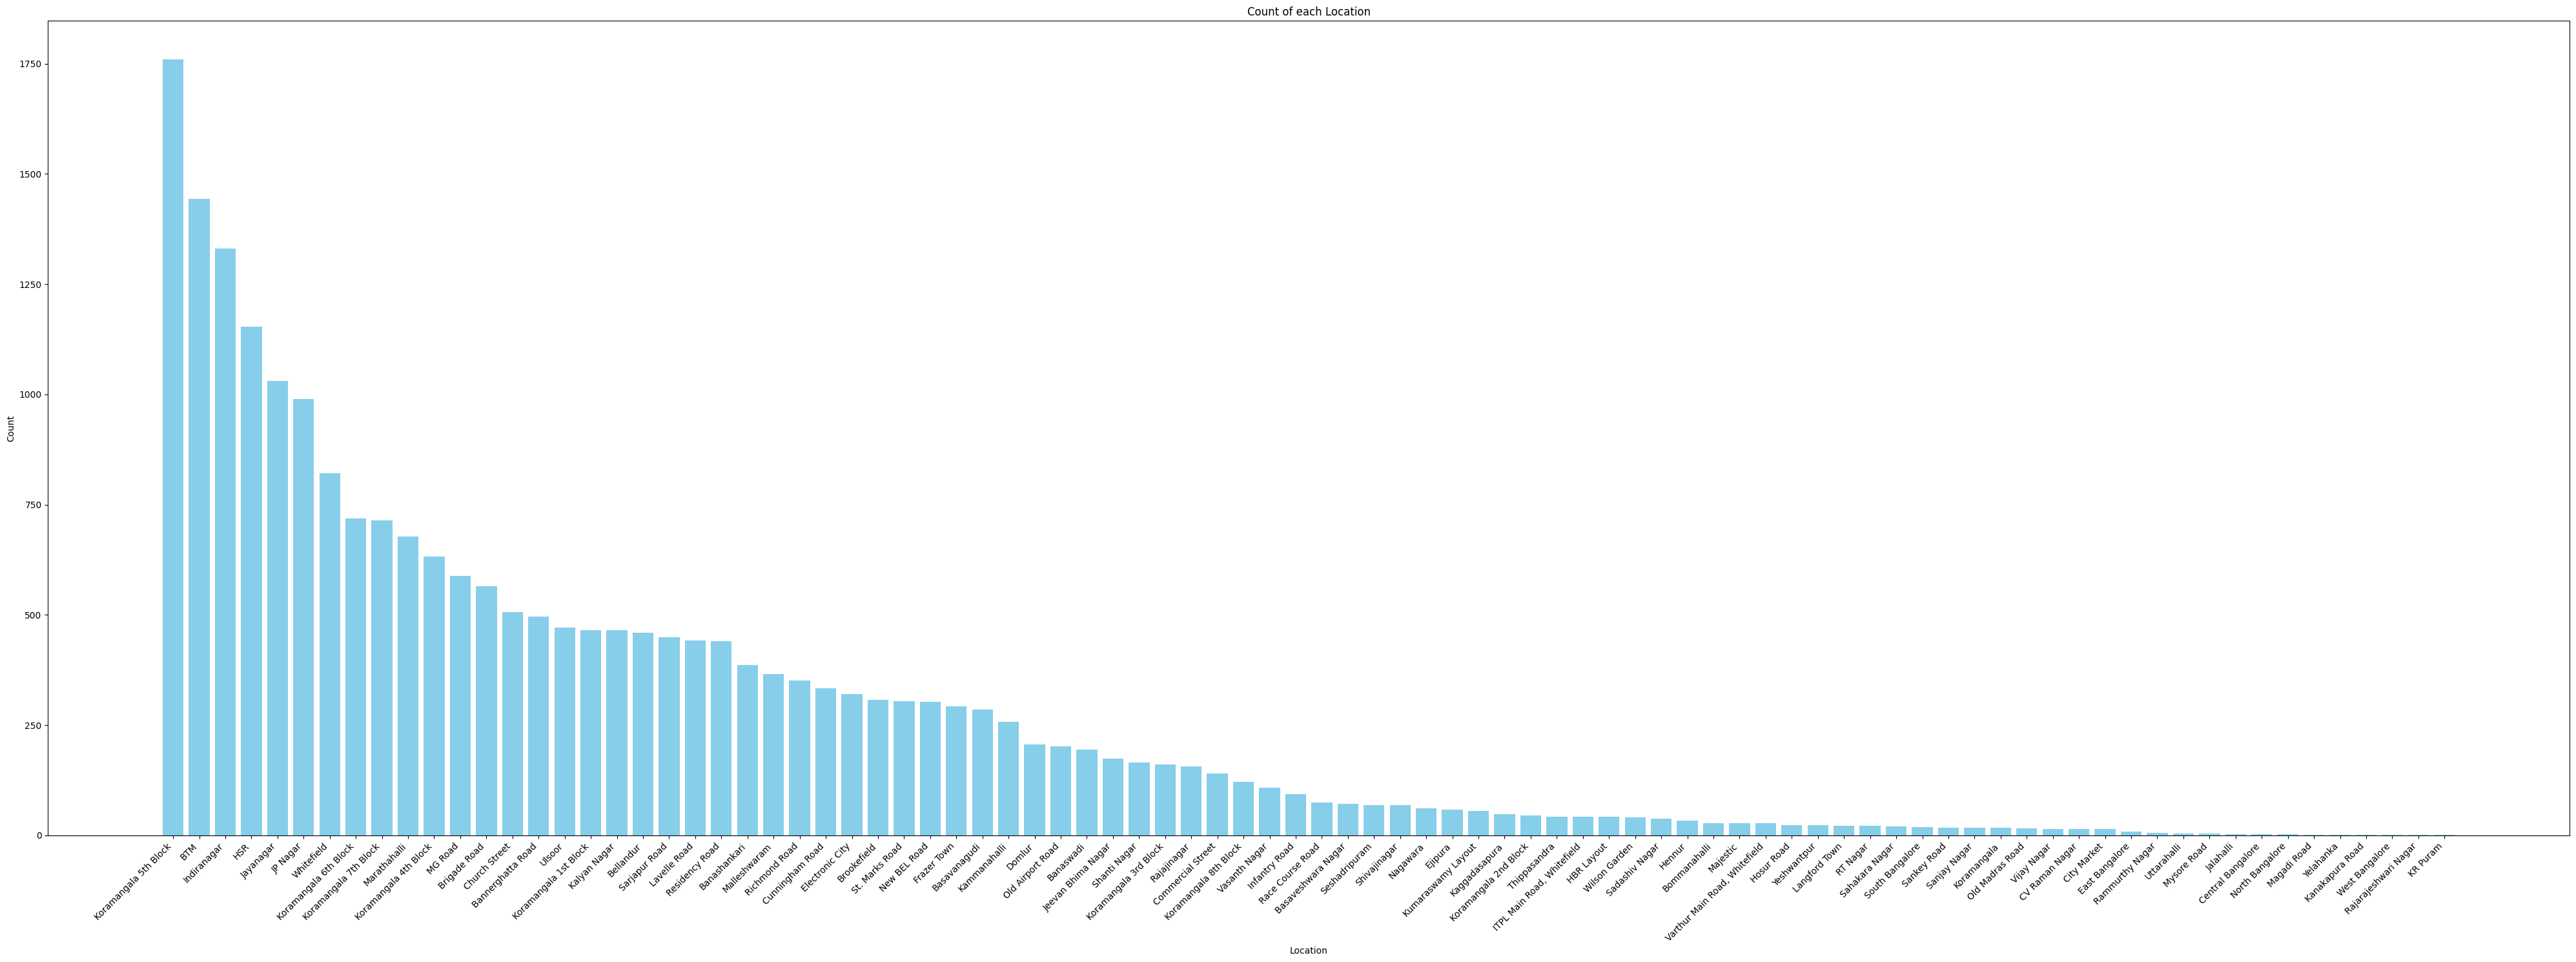

In [106]:

plt.figure(figsize=(40, 15))
plt.bar(loc.index, loc, color='skyblue')
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Count of each Location')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

In [107]:
df['rate'].unique()

array(['4.1', '3.8', '3.7', '4.6', '4.0', '4.2', '3.9', '3.0', '3.6',
       '2.8', '4.4', '3.1', '4.3', '2.6', '3.3', '3.5', '3.8 ', '3.2',
       '4.5', '2.5', '2.9', '3.4', '2.7', '4.7', '2.4', '2.2', '2.3',
       '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ', '2.9 ', '2.7 ', '2.5 ',
       '2.6 ', '4.5 ', '4.3 ', '3.7 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '3.4 ', '3.6 ', '3.3 ', '4.6 ', '4.9 ', '3.2 ', '3.0 ', '2.8 ',
       '3.5 ', '3.1 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ', '2.2 ',
       '2.0 ', '1.8 '], dtype=object)

In [108]:
df['rate'].min()

'1.8'

In [109]:
df['rate'].max()

'4.9 '

In [110]:
df['rate']=df['rate'].astype(float)

In [111]:
df.dtypes

address          object
name             object
online_order     object
book_table       object
rate            float64
votes             int64
phone            object
location         object
rest_type        object
dish_liked       object
cuisines         object
cost            float64
type             object
city             object
dtype: object

In [112]:
((df['rate']>=1) & (df['rate']<2)).sum()

5

In [113]:

((df['rate']>=2) & (df['rate']<3)).sum()

1168

In [114]:
((df['rate']>=3) & (df['rate']<4)).sum()

10116

In [115]:

(df['rate']>=4).sum()

11723

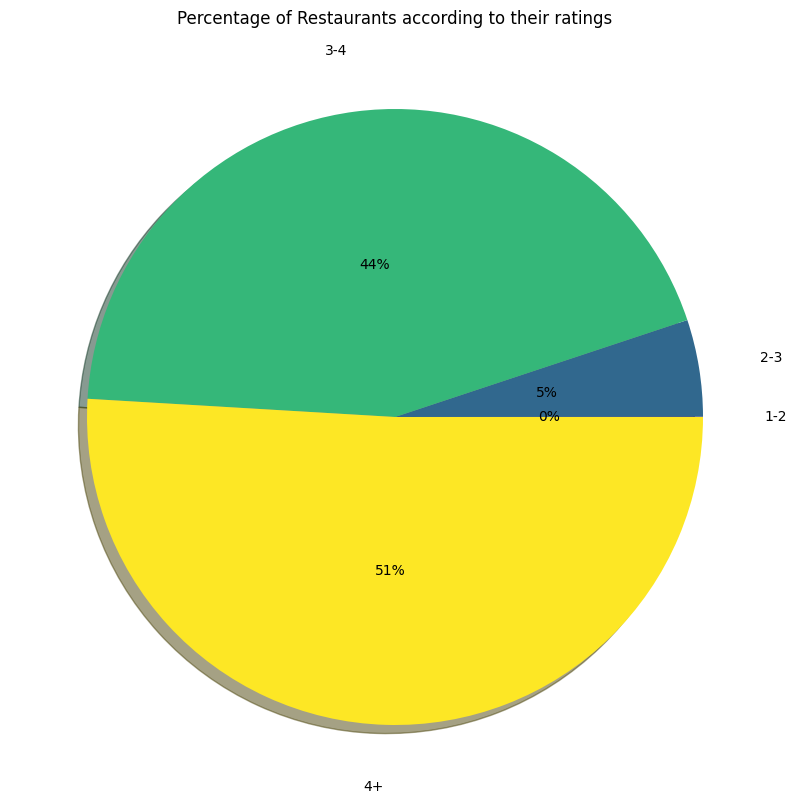

In [116]:
slices = [((df['rate'] >= 1) & (df['rate'] < 2)).sum(),
          ((df['rate'] >= 2) & (df['rate'] < 3)).sum(),
          ((df['rate'] >= 3) & (df['rate'] < 4)).sum(),
          (df['rate'] >= 4).sum()]

labels = ['1-2', '2-3', '3-4', '4+']  # Labels for the slices

# Define colors using Viridis colormap
colors = plt.cm.viridis(np.linspace(0, 1, len(slices)))

plt.pie(slices, labels=labels, autopct='%1.0f%%', pctdistance=.5, labeldistance=1.2, shadow=True, colors=colors)
fig = plt.gcf()
plt.title("Percentage of Restaurants according to their ratings")
fig.set_size_inches(10, 10)
plt.show()

/tmp/ipykernel_2895/1680361478.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='viridis')


Text(0.5, 1.0, 'Type of Service')

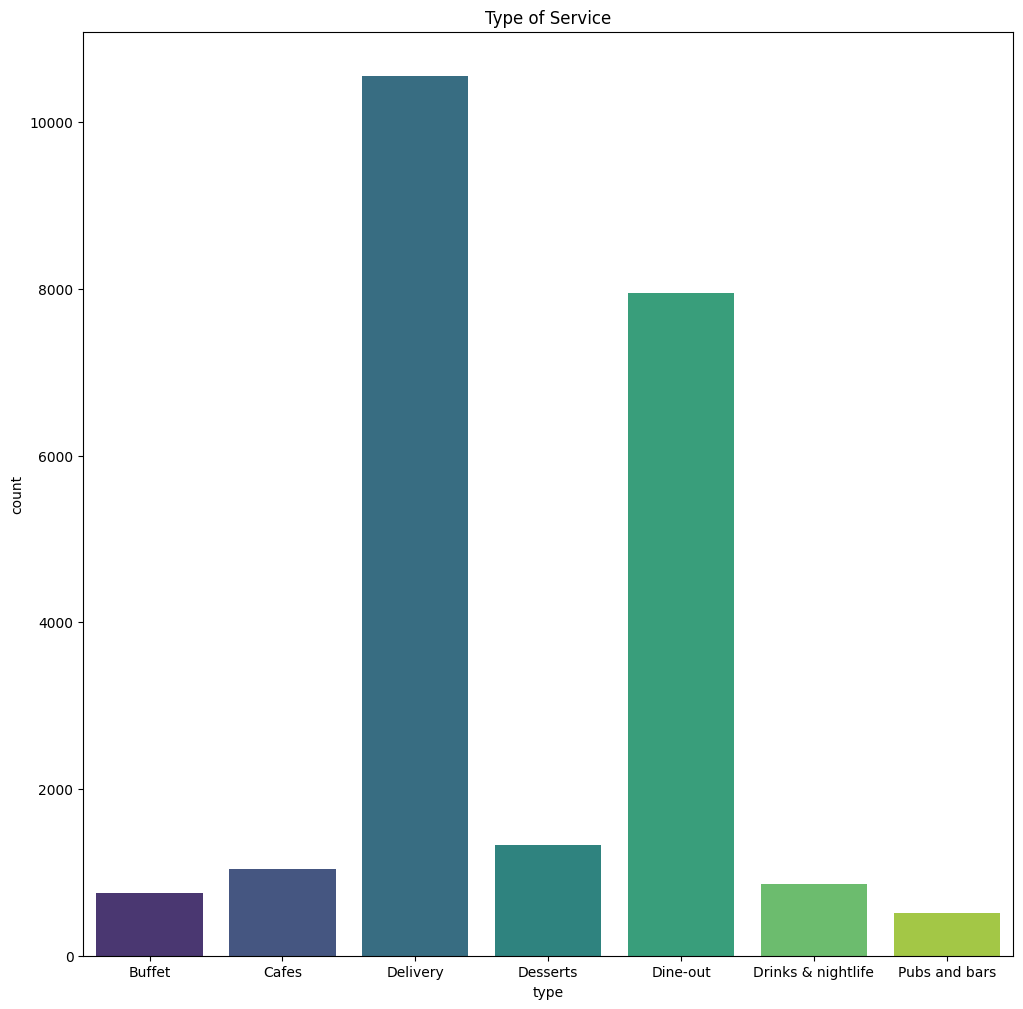

In [117]:

sns.countplot(data=df, x='type', palette='viridis')

fig = plt.gcf()
fig.set_size_inches(12,12)
plt.title('Type of Service')

In [118]:
df.index=range(df.shape[0])
likes=[]
for i in range(df.shape[0]):
    array_split=re.split(',',df['dish_liked'][i])
    for item in array_split:
        likes.append(item)

In [119]:
df

,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,cost,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23007,"2nd Floor, Iona, Virginia Mall, Whitefield Mai...",Izakaya Gastro Pub,Yes,Yes,3.8,128,+91 7625087121\n+91 8050587483,Whitefield,"Bar, Casual Dining","Beer, Chicken Guntur, Paneer Tikka, Fish, Nood...","North Indian, Continental, Mediterranean",1200.0,Pubs and bars,Whitefield
23008,"Bengaluru Marriott Hotel, 75, 8th Road, EPIP A...",M Bar Bengaluru Marriott Hotel Whitefield,No,No,3.9,77,080 49435000,Whitefield,"Fine Dining, Bar",Rooftop Ambience,Finger Food,2000.0,Pubs and bars,Whitefield
23009,"Keys Hotel, 6, 1st Phase Industrial Area, Near...",Keys Cafe Keys Hotel,No,No,2.8,161,080 39451000\n+91 8884038484,Whitefield,"Casual Dining, Bar","Salads, Coffee, Breakfast Buffet, Halwa, Chick...","Chinese, Continental, North Indian",1200.0,Pubs and bars,Whitefield
23010,"139/C1, Next To GR Tech Park, Pattandur Agraha...",Bhagini,No,No,2.5,81,080 65951222,Whitefield,"Casual Dining, Bar","Biryani, Andhra Meal","Andhra, South Indian, Chinese, North Indian",800.0,Pubs and bars,Whitefield


In [120]:
df.index=range(df.shape[0])

In [121]:
df.index

RangeIndex(start=0, stop=23012, step=1)

In [122]:
print("Count of Most liked dishes in Bangalore")
favourite_food = pd.Series(likes).value_counts()
favourite_food.head(30)

Count of Most liked dishes in Bangalore


 Pasta              2641
 Pizza              1895
 Cocktails          1850
 Burgers            1719
 Mocktails          1575
 Biryani            1304
 Sandwiches         1280
Burgers             1237
 Coffee             1155
 Nachos             1148
 Fish               1113
 Paratha            1095
 Salads             1035
 Chicken Biryani    1002
Cocktails            887
 Fries               873
 Mutton Biryani      832
 Beer                827
 Noodles             821
 Tea                 799
 Sandwich            784
 Butter Chicken      782
Coffee               782
 Thali               770
Biryani              747
Pizza                734
 Roti                719
 Brownie             710
 Salad               675
 Hot Chocolate       666
Name: count, dtype: int64

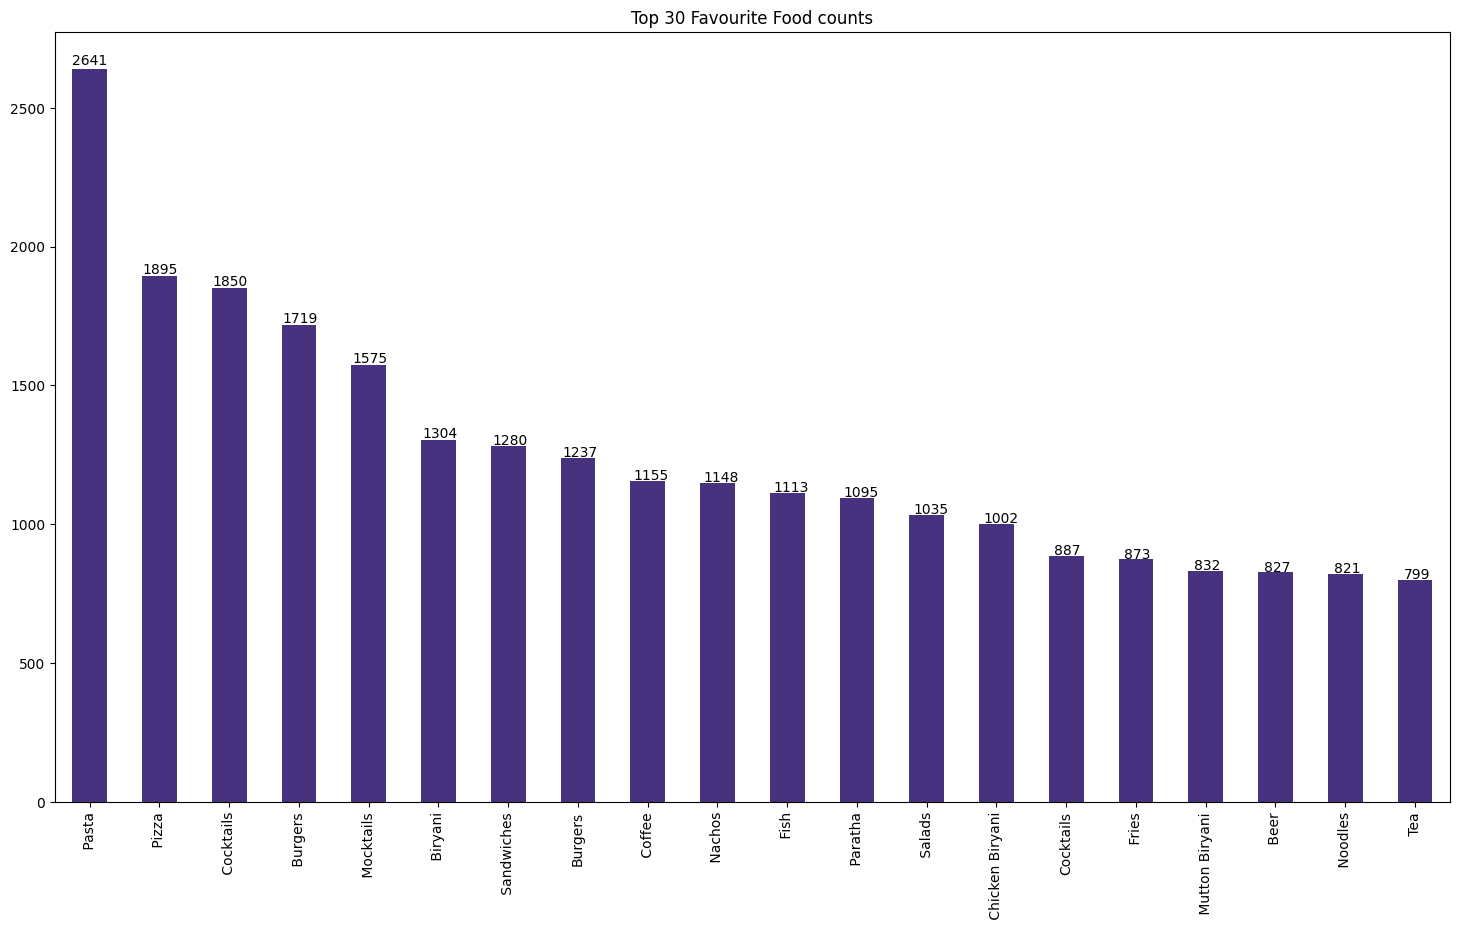

In [123]:

sns.set_palette('viridis')

ax = favourite_food.nlargest(n=20, keep='first').plot(
    kind='bar',
    figsize=(18,10),
    title='Top 30 Favourite Food counts'
)

for i in ax.patches:
    ax.annotate(str(i.get_height()), (i.get_x() * 1.005, i.get_height() * 1.005))

In [124]:
df.head()

,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,cost,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,Buffet,Banashankari


In [125]:
h1=[]
df['dish_liked'].apply(lambda x: h1.extend(x.split("','")))
h1=pd.Series(h1)
h1
print(h1.unique())
print(len(h1.unique()))

['Pasta, Lunch Buffet, Masala Papad, Paneer Lajawab, Tomato Shorba, Dum Biryani, Sweet Corn Soup'
 'Momos, Lunch Buffet, Chocolate Nirvana, Thai Green Curry, Paneer Tikka, Dum Biryani, Chicken Biryani'
 'Churros, Cannelloni, Minestrone Soup, Hot Chocolate, Pink Sauce Pasta, Salsa, Veg Supreme Pizza'
 ...
 'Noodles, Chicken Noodle, Momos, American Chopsuey, Salad, Manchow Soup, Manchurian'
 'Chicken Quesadilla, Naan, Breakfast Buffet, Cheesecake, Cocktails, Lunch Buffet, Biryani'
 'Biryani, Andhra Meal']
5145


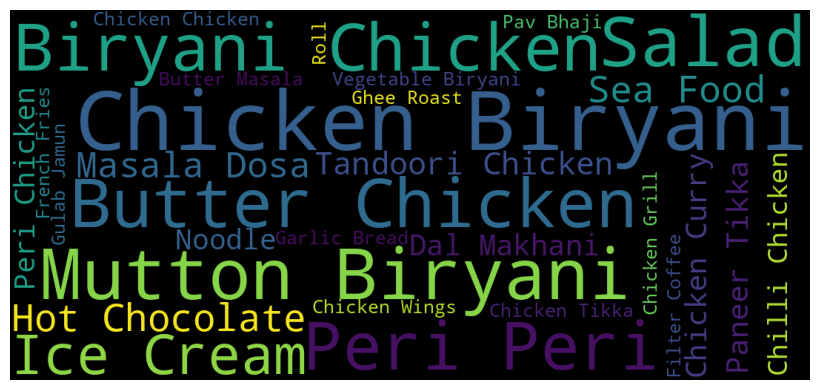

In [126]:
h1_str=""
for i in h1:
  h1_str+=str(i)+" "
wordcloud = wordcloud.WordCloud(width=1080,height=500,background_color='black',min_font_size=10,max_words=30).generate(h1_str)
plt.figure(figsize=(8,8),facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


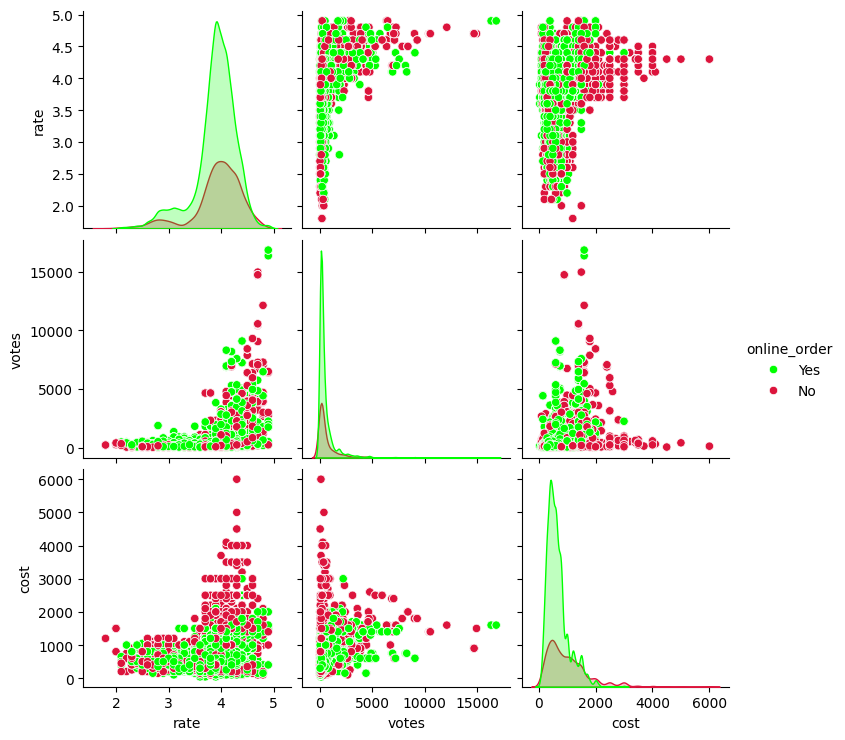

In [127]:
colors = {'Yes': 'lime', 'No': 'crimson'}

# Create pairplot with specified colors
sns.pairplot(df, hue='online_order', palette=colors)
plt.show()

In [128]:
df2=pd.read_csv('/home/user/project_web/map.csv')
df2

,Address,Status geocode,Formatted address,Latitude,Longitude,Type,Location Type,Street number,Street,Postal code,City,Country,Region,Department,Department number,Plus_Code,Plus_Code_Compound,Plus_Code_Global,count
0,Banashankari,Ok,"Banashankari, Bengaluru, Karnataka, India",12.925453,77.546757,"political, sublocality, sublocality_level_1",APPROXIMATE,NaN,NaN,NaN,Bengaluru,India,Karnataka,Bangalore Division,Bangalore Division,NaN,NaN,NaN,905
1,Basavanagudi,Ok,"Basavanagudi, Bengaluru, Karnataka, India",12.940600,77.573763,"political, sublocality, sublocality_level_1",APPROXIMATE,NaN,NaN,NaN,Bengaluru,India,Karnataka,Bangalore Division,Bangalore Division,NaN,NaN,NaN,684
2,Mysore Road,"2 found, use single geocode.","Mysore Rd, Karnataka, India",12.637168,77.130160,route,GEOMETRIC_CENTER,NaN,Mysore Road,NaN,NaN,India,Karnataka,NaN,NaN,NaN,NaN,NaN,22
3,Jayanagar,Ok,"Jayanagar, Bengaluru, Karnataka, India",12.930774,77.583830,"political, sublocality, sublocality_level_1",APPROXIMATE,NaN,NaN,NaN,Bengaluru,India,Karnataka,Bangalore Division,Bangalore Division,NaN,NaN,NaN,1926
4,Kumaraswamy Layout,Ok,"Kumaraswamy Layout, Bengaluru, Karnataka 56007...",12.904438,77.564928,"political, sublocality, sublocality_level_1",APPROXIMATE,NaN,NaN,560078.0,Bengaluru,India,Karnataka,Bangalore Division,Bangalore Division,NaN,NaN,NaN,195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,West Bangalore,Ok,"Bengaluru, Karnataka, India",12.971599,77.594563,"locality, political",APPROXIMATE,NaN,NaN,NaN,Bengaluru,India,Karnataka,Bangalore Division,Bangalore Division,NaN,NaN,NaN,6
89,Magadi Road,Ok,"Magadi Main Rd, Karnataka, India",12.966305,77.401084,route,GEOMETRIC_CENTER,NaN,Magadi Main Road,NaN,NaN,India,Karnataka,Bangalore Division,Bangalore Division,NaN,NaN,NaN,34
90,Yelahanka,Ok,"Yelahanka, Bengaluru, Karnataka, India",13.115466,77.606998,"political, sublocality, sublocality_level_1",APPROXIMATE,NaN,NaN,NaN,Bengaluru,India,Karnataka,Bangalore Division,Bangalore Division,NaN,NaN,NaN,6
91,Sahakara Nagar,Ok,"Sahakar Nagar, Bengaluru, Karnataka, India",13.062342,77.587103,"political, sublocality, sublocality_level_2",APPROXIMATE,NaN,NaN,NaN,Bengaluru,India,Karnataka,Bangalore Division,Bangalore Division,NaN,NaN,NaN,53


In [129]:
map_loc=df2[['Latitude','Longitude','count']]
map_loc


,Latitude,Longitude,count
0,12.925453,77.546757,905
1,12.940600,77.573763,684
2,12.637168,77.130160,22
3,12.930774,77.583830,1926
4,12.904438,77.564928,195
...,...,...,...
88,12.971599,77.594563,6
89,12.966305,77.401084,34
90,13.115466,77.606998,6
91,13.062342,77.587103,53


In [130]:
map_loc.isna().sum()

Latitude     6
Longitude    6
count        0
dtype: int64

In [131]:
map_loc.dtypes

Latitude     float64
Longitude    float64
count          int64
dtype: object

In [132]:
map_loc['count'] = map_loc['count'].astype(float)

/tmp/ipykernel_2895/1843264588.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  map_loc['count'] = map_loc['count'].astype(float)


In [133]:
mapObj = folium.Map(location=[12.971599,77.594566], title='zomato city in banglore ', zoom_start=11,width=800, height=800)

In [134]:
# Check for NaN values in Latitude and Longitude columns
print(df2['Latitude'].isnull().any())
print(df2['Longitude'].isnull().any())

# Remove rows with NaN values
df2 = df2.dropna(subset=['Latitude', 'Longitude'])
scaling_factor = 0.1
# Create the markers
for i in range(len(df2)):
    lat = df2.iloc[i]['Latitude']
    lon = df2.iloc[i]['Longitude']
    rad = df2.iloc[i]['count']
    clr= 'red' if rad>=1000 else 'blue'
    radius=(rad*scaling_factor)*10
    folium.Circle(location=[lat, lon],color=clr,radius=radius,fill=True).add_to(mapObj)
mapObj

True
True


In [135]:
df.drop(['address','name','phone','dish_liked','type','city'],axis=1,inplace=True)
df

,online_order,book_table,rate,votes,location,rest_type,cuisines,cost
0,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0
1,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0
2,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0
3,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0
4,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0
...,...,...,...,...,...,...,...,...
23007,Yes,Yes,3.8,128,Whitefield,"Bar, Casual Dining","North Indian, Continental, Mediterranean",1200.0
23008,No,No,3.9,77,Whitefield,"Fine Dining, Bar",Finger Food,2000.0
23009,No,No,2.8,161,Whitefield,"Casual Dining, Bar","Chinese, Continental, North Indian",1200.0
23010,No,No,2.5,81,Whitefield,"Casual Dining, Bar","Andhra, South Indian, Chinese, North Indian",800.0


In [136]:
df.dtypes

online_order     object
book_table       object
rate            float64
votes             int64
location         object
rest_type        object
cuisines         object
cost            float64
dtype: object

In [137]:
from sklearn.preprocessing import LabelEncoder
le_location=LabelEncoder()
df['location']=le_location.fit_transform(df['location'])

In [138]:
le_online_order=LabelEncoder()
df['online_order']=le_online_order.fit_transform(df['online_order'])
le_book_table=LabelEncoder()
df['book_table']=le_book_table.fit_transform(df['book_table'])
le_rest_type=LabelEncoder()
df['rest_type']=le_rest_type.fit_transform(df['rest_type'])
le_cuisines=LabelEncoder()
df['cuisines']=le_cuisines.fit_transform(df['cuisines'])

In [139]:
df.head()

,online_order,book_table,rate,votes,location,rest_type,cuisines,cost
0,1,1,4.1,775,1,20,1382,800.0
1,1,0,4.1,787,1,20,592,800.0
2,1,0,3.8,918,1,16,482,800.0
3,0,0,3.7,88,1,62,1583,300.0
4,0,0,3.8,166,4,20,1402,600.0


In [140]:
df.corr()

,online_order,book_table,rate,votes,location,rest_type,cuisines,cost
online_order,1.000000,-0.139927,-0.038553,-0.080125,-0.099317,0.047999,-0.023847,-0.295463
book_table,-0.139927,1.000000,0.357673,0.325722,0.108150,-0.219763,0.006816,0.604290
rate,-0.038553,0.357673,1.000000,0.381790,0.112614,-0.149548,-0.105117,0.314521
votes,-0.080125,0.325722,0.381790,1.000000,0.046222,-0.092067,-0.049457,0.310150
location,-0.099317,0.108150,0.112614,0.046222,1.000000,-0.077538,-0.000847,0.200298
rest_type,0.047999,-0.219763,-0.149548,-0.092067,-0.077538,1.000000,0.254334,-0.256963
cuisines,-0.023847,0.006816,-0.105117,-0.049457,-0.000847,0.254334,1.000000,-0.046612
cost,-0.295463,0.604290,0.314521,0.310150,0.200298,-0.256963,-0.046612,1.000000


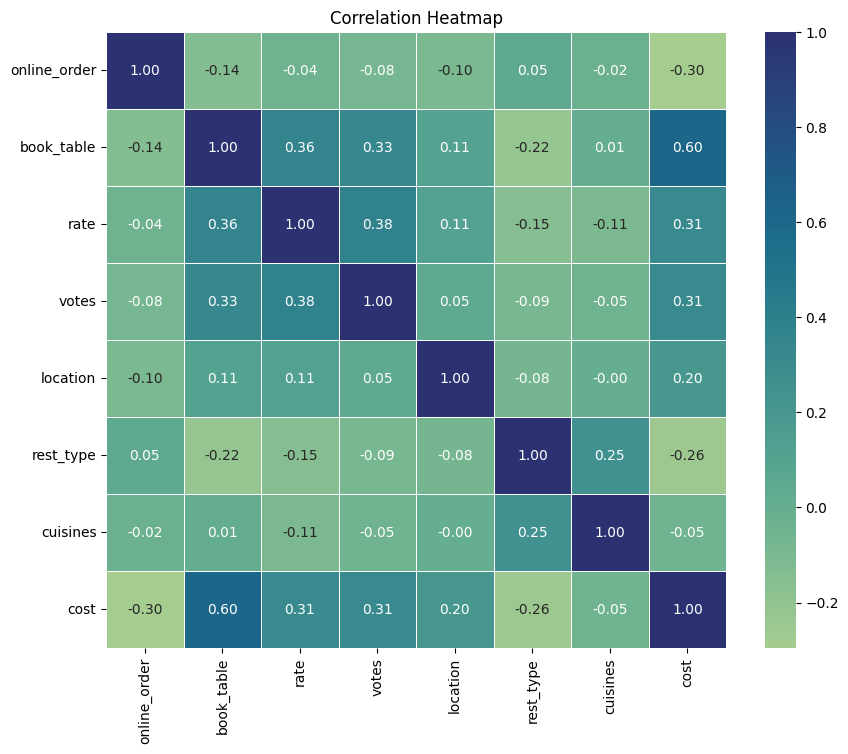

In [141]:
correlation_matrix = df.corr()

# Create heatmap with annotations
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap="crest", fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

<Axes: xlabel='book_table', ylabel='cost'>

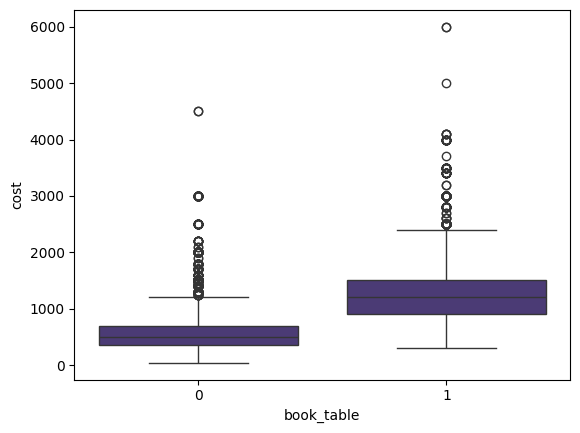

In [142]:
sns.boxplot(x='book_table',y='cost',data=df)

sns.boxplot(x='book_table',y='rate',data=df)

In [143]:
c=df['cost'].mean()
for i in df.index:
    if df.loc[i,'cost']>3000:
        df.loc[i,'cost']=c
print(df)

       online_order  book_table  rate  votes  location  rest_type  cuisines  \
0                 1           1   4.1    775         1         20      1382   
1                 1           0   4.1    787         1         20       592   
2                 1           0   3.8    918         1         16       482   
3                 0           0   3.7     88         1         62      1583   
4                 0           0   3.8    166         4         20      1402   
...             ...         ...   ...    ...       ...        ...       ...   
23007             1           1   3.8    128        84          5      1314   
23008             0           0   3.9     77        84         38       876   
23009             0           0   2.8    161        84         21       537   
23010             0           0   2.5     81        84         21        79   
23011             0           1   4.3    236        25          4       876   

         cost  
0       800.0  
1       800.0  
2  

<Axes: xlabel='book_table', ylabel='cost'>

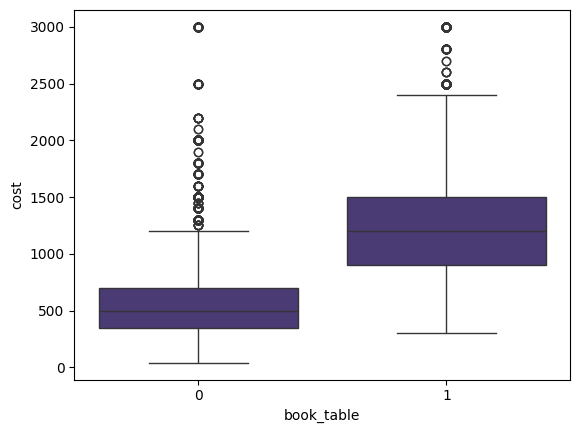

In [144]:
sns.boxplot(x='book_table',y='cost',data=df)

In [145]:
x = df.iloc[:,[0, 1, 3, 4, 5, 6]]
x

,online_order,book_table,votes,location,rest_type,cuisines
0,1,1,775,1,20,1382
1,1,0,787,1,20,592
2,1,0,918,1,16,482
3,0,0,88,1,62,1583
4,0,0,166,4,20,1402
...,...,...,...,...,...,...
23007,1,1,128,84,5,1314
23008,0,0,77,84,38,876
23009,0,0,161,84,21,537
23010,0,0,81,84,21,79


In [146]:
y=df['rate']
y

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
23007    3.8
23008    3.9
23009    2.8
23010    2.5
23011    4.3
Name: rate, Length: 23012, dtype: float64

In [147]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train

,online_order,book_table,votes,location,rest_type,cuisines
7353,1,0,716,22,20,973
11562,1,0,293,43,45,1640
7117,1,0,68,22,20,1615
14023,0,1,2365,44,21,1120
18573,1,1,511,9,20,47
...,...,...,...,...,...,...
11964,1,1,402,42,15,420
21575,0,1,578,48,37,961
5390,1,0,115,66,13,167
860,0,0,82,28,47,1468


In [148]:
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
RF_Model=RandomForestRegressor(n_estimators=650,random_state=245,min_samples_leaf=.0001)
RF_Model.fit(x_train,y_train)
y_predict=RF_Model.predict(x_test)
r2_score(y_test,y_predict)

0.8764961595809856

In [149]:
from sklearn.ensemble import  ExtraTreesRegressor
ET_Model=ExtraTreesRegressor(n_estimators = 120)
ET_Model.fit(x_train,y_train)
y_predict=ET_Model.predict(x_test)


from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.9239207537947481

In [150]:
print(ET_Model.predict([[1,1,756,84,17,21]]))

[4.4075]


/home/user/.local/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


In [151]:
test=np.array([['Yes','No',756,'Banashankari','Casual Dining','North Indian, Mughlai, Chinese']])
test

array([['Yes', 'No', '756', 'Banashankari', 'Casual Dining',
        'North Indian, Mughlai, Chinese']], dtype='<U30')

In [152]:
test[:,0]=le_online_order.transform(test[:,0])
test[:,1]=le_book_table.transform(test[:,1])
test[:,3]=le_location.transform(test[:,3])
test[:,4]=le_rest_type.transform(test[:,4])
test[:,5]=le_cuisines.transform(test[:,5])
test=test.astype(int)
test

array([[   1,    0,  756,    1,   20, 1382]])

In [153]:
test_pred=ET_Model.predict(test)
test_pred

/home/user/.local/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


array([3.85416667])

In [154]:
data={"model":ET_Model,"le_online_order":le_online_order,"le_book_table":le_book_table,"le_location":le_location,"le_rest_type":le_rest_type,"le_cuisines":le_cuisines}
with open('saved_steps.pkl','wb') as file:
  pickle.dump(data,file)

In [155]:
with open('saved_steps.pkl','rb') as file:
  data=pickle.load(file)


ET_Model_loaded=data['model']
le_location=data['le_location']
le_online_order=data['le_online_order']
le_book_table=data['le_book_table']
le_rest_type=data['le_rest_type']
le_cuisines=data['le_cuisines']

In [156]:
y_pred=ET_Model_loaded.predict(test)
y_pred

/home/user/.local/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


array([3.85416667])